In [1]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as  plt
from scipy.optimize import curve_fit
from scipy.special import gamma
import fileread as fr
import predefined as pd
import warnings

def gam(x,*pars):
    a,k,theta,offset=pars
    res=np.zeros_like(x)
    res[x-offset>0]=a*(x[x-offset>0]-offset)**(k-1.)*np.exp(-1.*(x[x-offset>0]-offset)/theta)*theta**(-1.*k)*gamma(k)**(-1.)
    return res

def dblgauss(x,*pars):
    a,mu1,sigma1,b,mu2,sigma2,offset,decay = pars
    return a*np.exp(-1.*(x-mu1)**2./(2.*sigma1**2.))+b*np.exp(-1.*(x-mu2)**2./(2.*sigma2**2.))+offset*np.exp(-1.*decay*x)

def dblexp(x,*pars):
    a,tau1,b,tau2,t0 = pars
    return a*np.exp(-1.*(x-t0)/tau1)-b*np.exp(-1.*(x-t0)/tau2)

def lingauss(x,*pars):
    a,mu,sigma,m,b = pars
    return a*np.exp(-(x-mu)**2./(2.*sigma**2.))+m*x+b

def combsets(runs):
    dat=[]
    for run in runs:
        print run
        dat.append(pd.precuts(fr.temp_gen_output('./Run_'+str(run)+str('-all.dat'))[0]))
    dat=np.concatenate(dat[:])
    return dat

linearity=np.ndarray((4,3))
peaks= np.fromfile('quick_fit.bin',dtype='float64',count=7)
print peaks
#[126.9329, 481.6935, 363.758, 553.8372]
#[124.70050000000001, 480.41150000000005, 362.37549999999999, 552.59550000000002]

bd,ch=4,2

[ 123.21526765  157.07913912  360.90496182  385.37829344  478.77851844
  552.09237311  563.67754473]


131
132


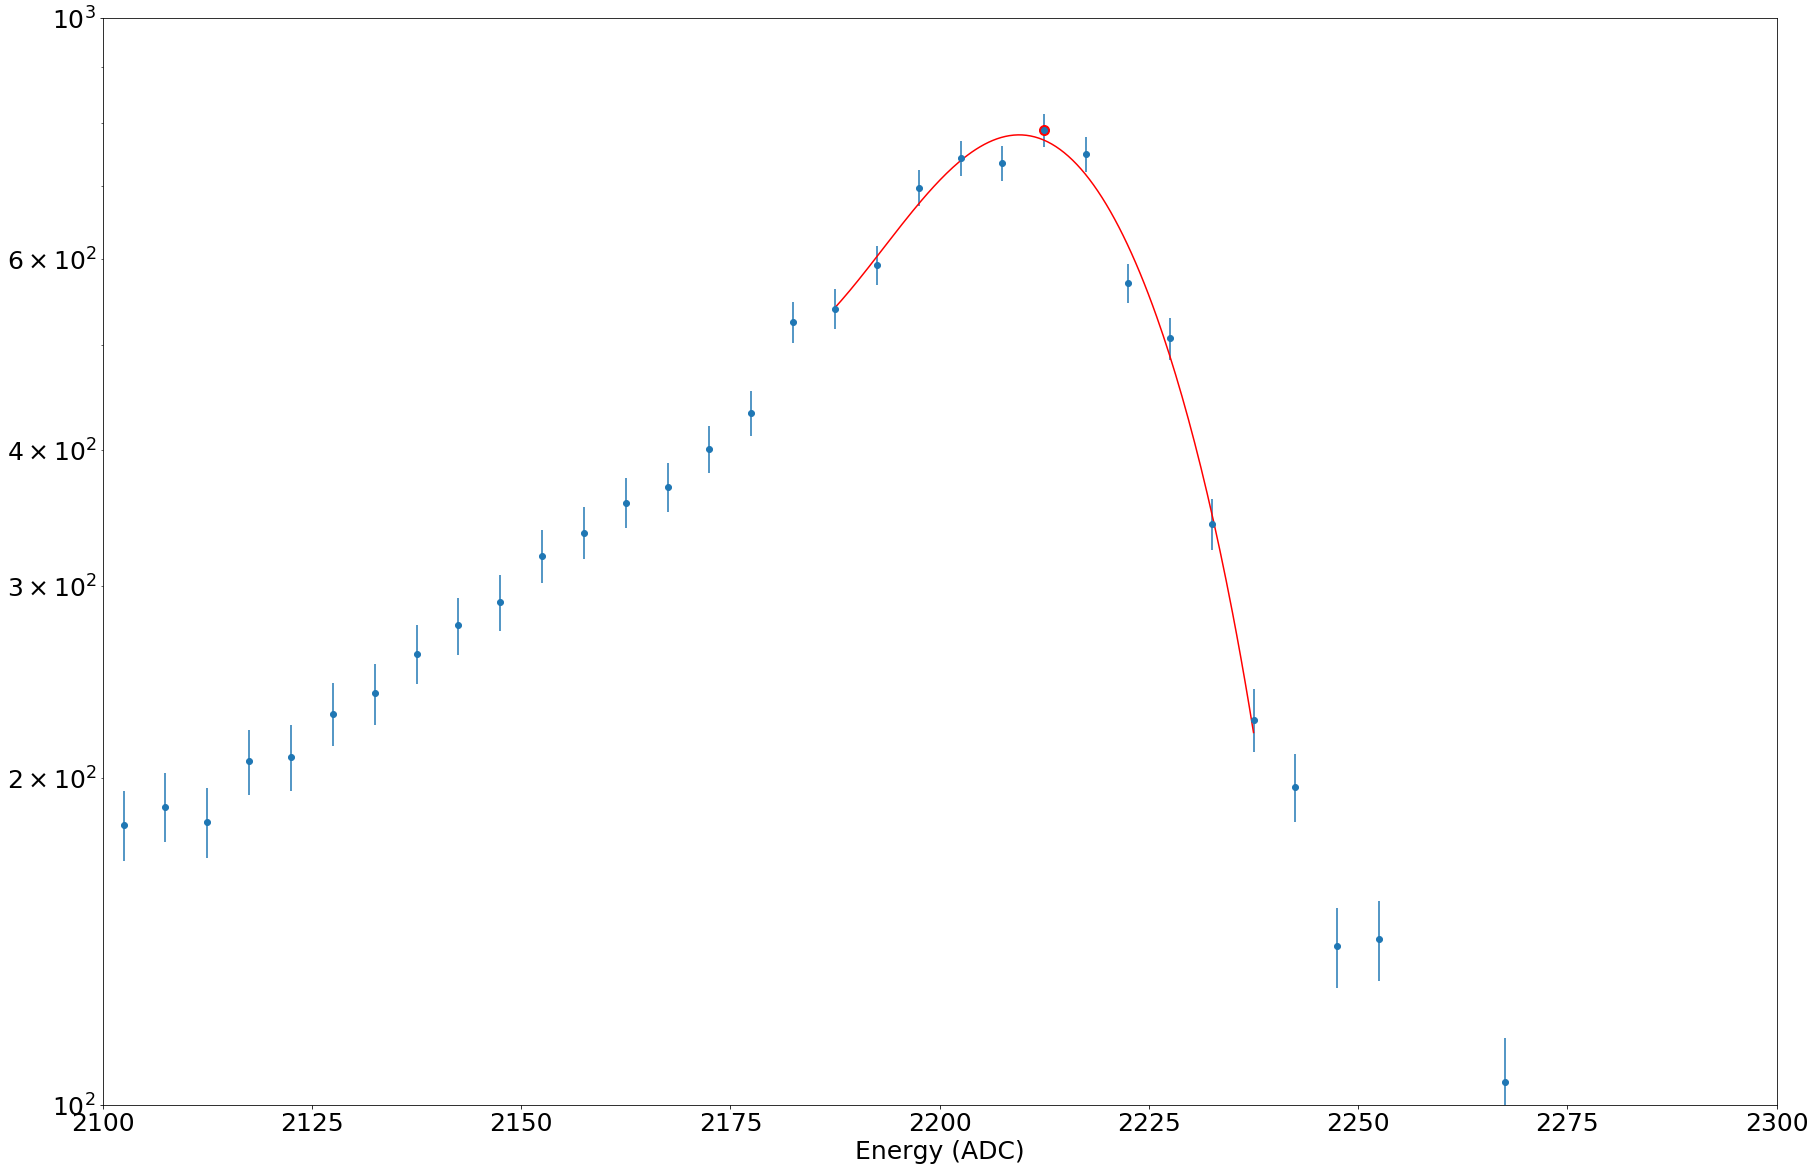

-0.338792156907


In [2]:
#Sn113 K shell peak location & counts ctd.
data=combsets([131,132])
ebins,erange=1000,[0,5000]
window=6
min,max=2000,2300
hist,bins=np.histogram(pd.pixcut(data[pd.lor(data['pileup']<2,data['pilediff']<60)],'energy',bd,ch),bins=ebins,range=erange)
bins=pd.cbins(bins)
loc=np.sum(bins<min)+np.argmax(hist[pd.land(bins>min,bins<max)])
beg,end=bins[loc-window],bins[loc+window]
fitbins=bins[pd.land(bins>beg,bins<end)]
fithist = hist[pd.land(bins>beg,bins<end)]
w=np.sqrt(fithist)
w[w==0]=1
w=1./w
pars=[hist[loc],bins[loc],30,0,0]
pars=curve_fit(lingauss,fitbins,fithist,sigma=w,p0=pars)[0]

s,e=fitbins[0],fitbins[len(fitbins)-1]
rng=np.linspace(s,e,200)

linearity[0,:2]=pars[1],pars[0]
linearity[0,2]=peaks[2]
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,yerr=np.sqrt(hist),fmt='o')
plt.yscale('log')
plt.xlim(2100,2300)
plt.ylim(100,1000)
plt.xlabel('Energy (ADC)',fontsize=25)
plt.tick_params(which='both',labelsize=25)
plt.plot(bins[loc],hist[loc],'ro',ms=10)
plt.plot(rng,lingauss(rng,*pars),'r-')
plt.savefig('Sn.png',format='png')
plt.show()

print bins[loc]-pars[1]

133
134
135


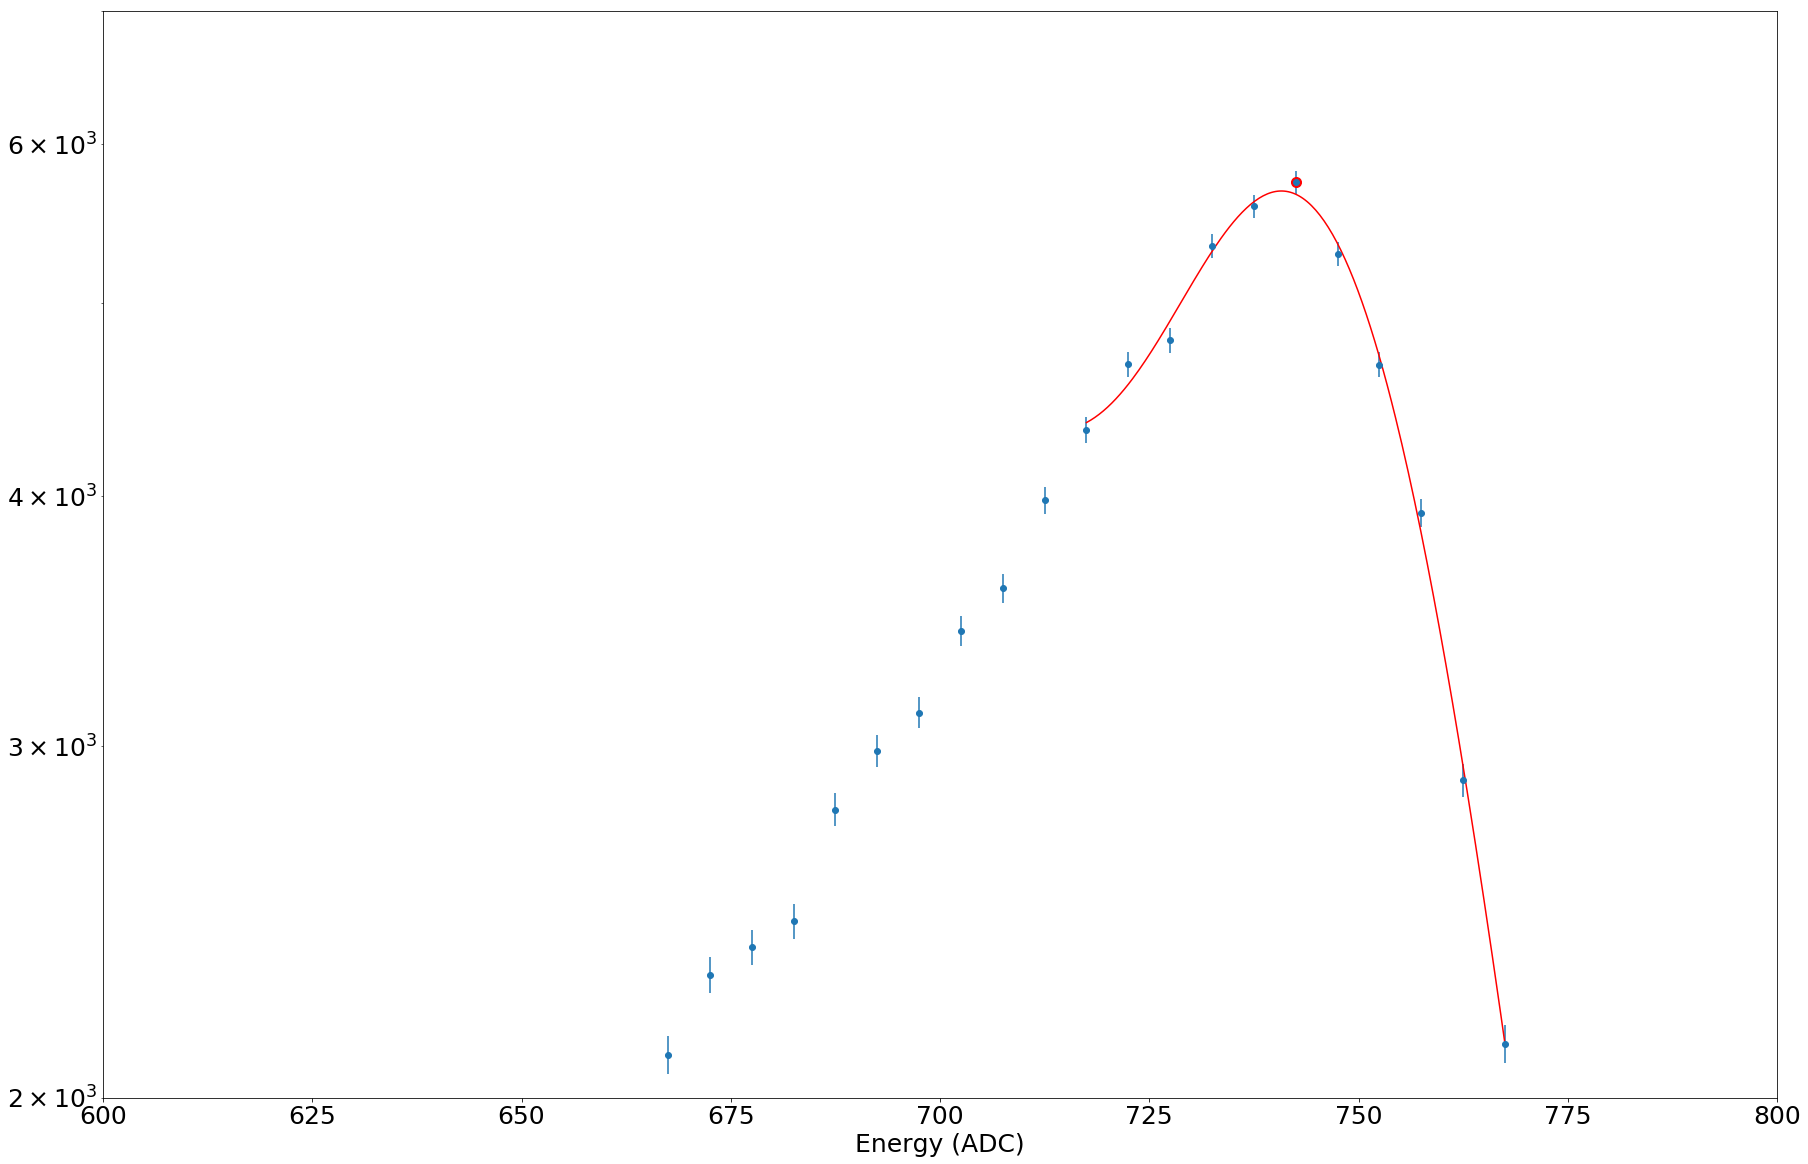

-1.65583259059


In [3]:
#Ce139 K shell peak location & counts ctd.
data=combsets(['133','134','135'])
min,max=700,800
hist,bins=np.histogram(pd.pixcut(data[pd.lor(data['pileup']<2,data['pilediff']<60)],'energy',bd,ch),bins=ebins,range=erange)
bins=pd.cbins(bins)
loc=np.sum(bins<min)+np.argmax(hist[pd.land(bins>min,bins<max)])
beg,end=bins[loc-window],bins[loc+window]
fitbins=bins[pd.land(bins>beg,bins<end)]
fithist = hist[pd.land(bins>beg,bins<end)]
w=np.sqrt(fithist)
w[w==0]=1
w=1./w
pars=[hist[loc],bins[loc],30,0,0]
pars=curve_fit(lingauss,fitbins,fithist,sigma=w,p0=pars)[0]

s,e=fitbins[0],fitbins[len(fitbins)-1]
rng=np.linspace(s,e,200)

linearity[1,:2]=pars[1],pars[0]
linearity[1,2]=peaks[0]
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,yerr=np.sqrt(hist),fmt='o')
plt.yscale('log')
plt.xlim(600,800)
plt.ylim(2000,7000)
plt.xlabel('Energy (ADC)',fontsize=25)
plt.plot(bins[loc],hist[loc],'ro',ms=10)
plt.plot(rng,lingauss(rng,*pars),'r-')
plt.tick_params(which='both',labelsize=25)
plt.savefig('Ce.png',format='png')
plt.show()
print bins[loc]-pars[1]

136
137


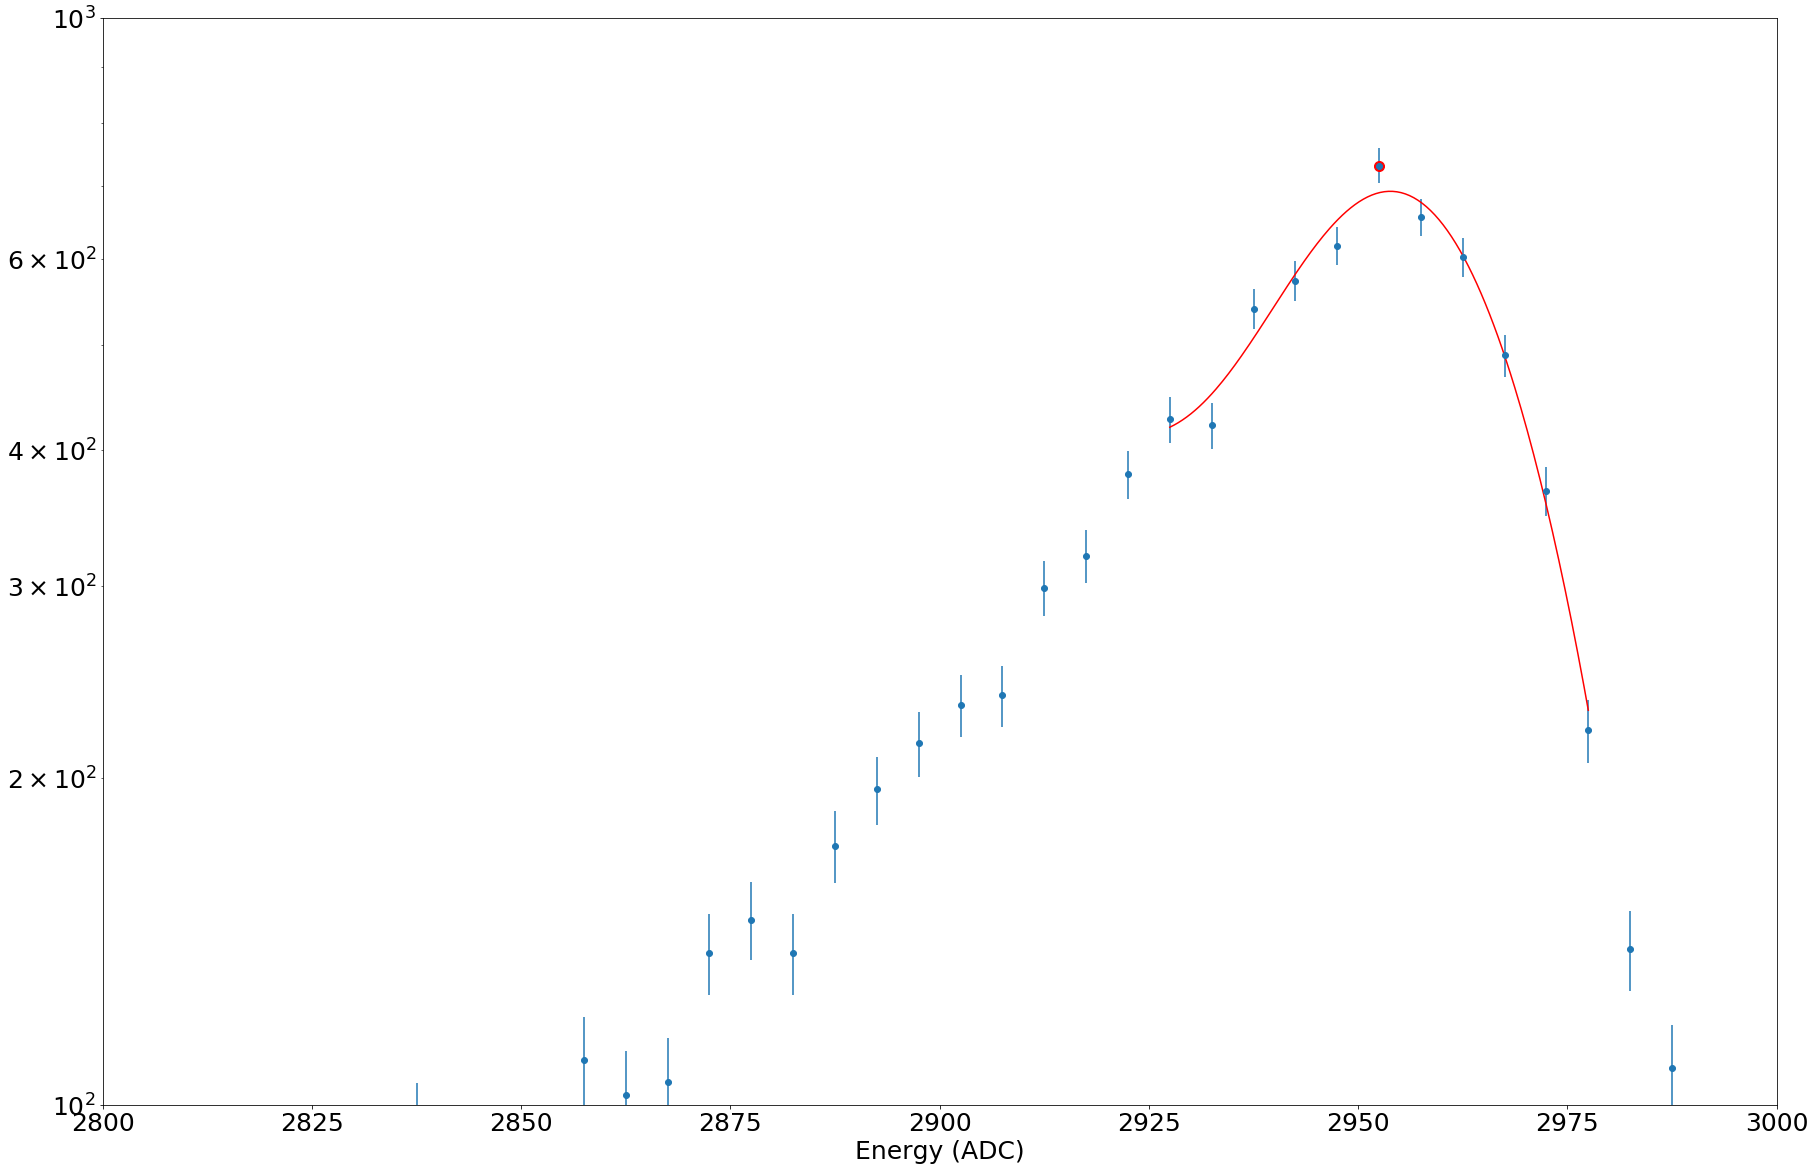

-3.7668433597


In [4]:
#Bi207 K shell peak location & counts
data=combsets([136,137])

#Bi207 K shell peak location & counts ctd.
min,max=2900,3100
hist,bins=np.histogram(pd.pixcut(data[pd.lor(data['pileup']<2,data['pilediff']<60)],'energy',bd,ch),bins=ebins,range=erange)
bins=pd.cbins(bins)
loc=np.sum(bins<min)+np.argmax(hist[pd.land(bins>min,bins<max)])
beg,end=bins[loc-window],bins[loc+window]
fitbins=bins[pd.land(bins>beg,bins<end)]
fithist = hist[pd.land(bins>beg,bins<end)]
w=np.sqrt(fithist)
w[w==0]=1
w=1./w
pars=[hist[loc],bins[loc],30,0,0]
pars=curve_fit(lingauss,fitbins,fithist,sigma=w,p0=pars)[0]

s,e=fitbins[0],fitbins[len(fitbins)-1]
rng=np.linspace(s,e,200)

linearity[2,:2]=pars[1],pars[0]
linearity[2,2]=peaks[4]
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,yerr=np.sqrt(hist),fmt='o')
plt.yscale('log')
plt.ylim(100,1000)
plt.xlim(2800,3000)
plt.xlabel('Energy (ADC)',fontsize=25)
plt.tick_params(which='both',labelsize=25)
plt.plot(bins[loc],hist[loc],'ro',ms=10)
plt.plot(rng,lingauss(rng,*pars),'r-')
plt.savefig('Bi.png',format='png')
plt.show()
print bins[loc]-pars[1]

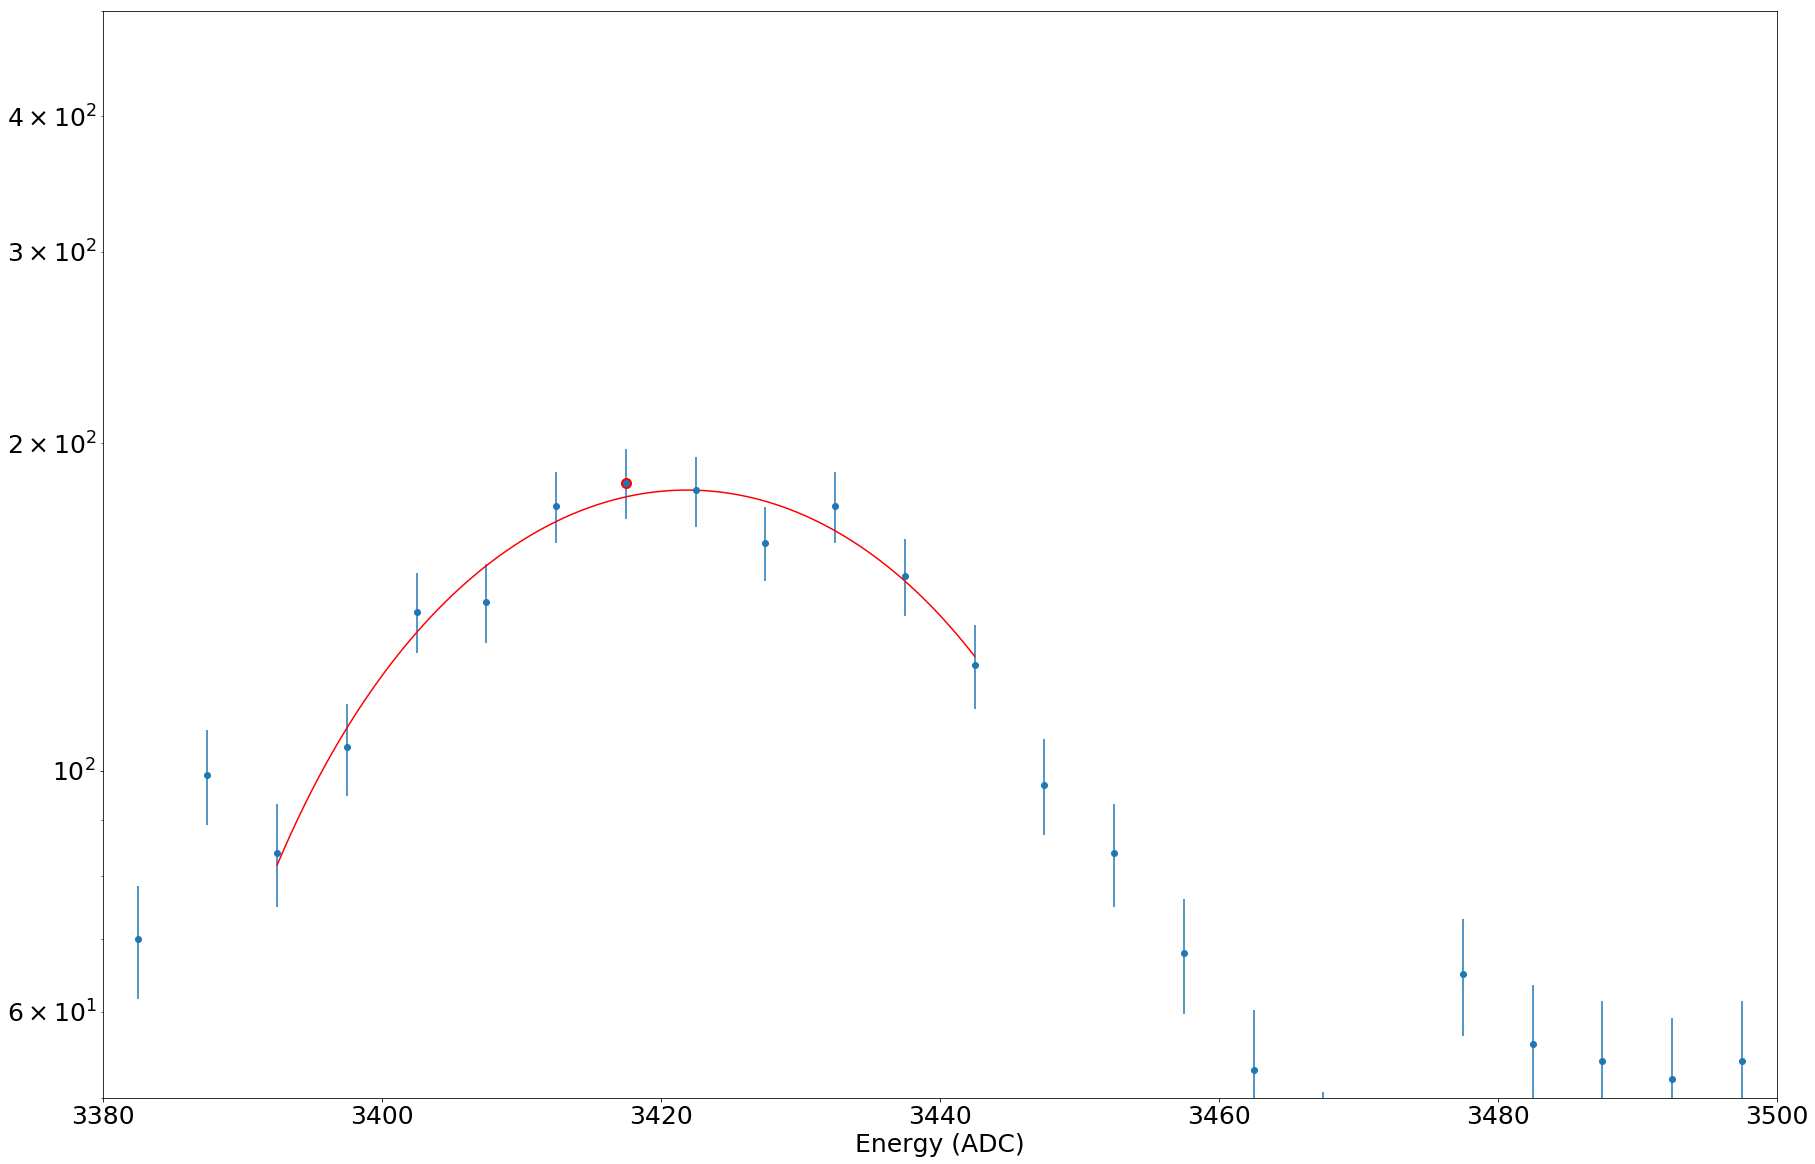

-5.00397358256


In [5]:
min,max=3380,3500
loc=np.sum(bins<min)+np.argmax(hist[pd.land(bins>min,bins<max)])
beg,end=bins[loc-window],bins[loc+window]
fitbins=bins[pd.land(bins>beg,bins<end)]
fithist = hist[pd.land(bins>beg,bins<end)]
w=np.sqrt(fithist)
w[w==0]=1
w=1./w
pars=[hist[loc],bins[loc],30,0,0]
pars=curve_fit(lingauss,fitbins,fithist,sigma=w,p0=pars)[0]

s,e=fitbins[0],fitbins[len(fitbins)-1]
rng=np.linspace(s,e,200)

linearity[3,:2]=pars[1],pars[0]
linearity[3,2]=peaks[5]
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,yerr=np.sqrt(hist),fmt='o')
plt.yscale('log')
plt.ylim(50,500)
plt.xlabel('Energy (ADC)',fontsize=25)
plt.xlim(min,max)
plt.tick_params(which='both',labelsize=25)
plt.plot(bins[loc],hist[loc],'ro',ms=10)
plt.plot(rng,lingauss(rng,*pars),'r-')
plt.savefig('Bi2.png',format='png')
plt.show()
print bins[loc]-pars[1]

[-29.34342951   6.23973239]


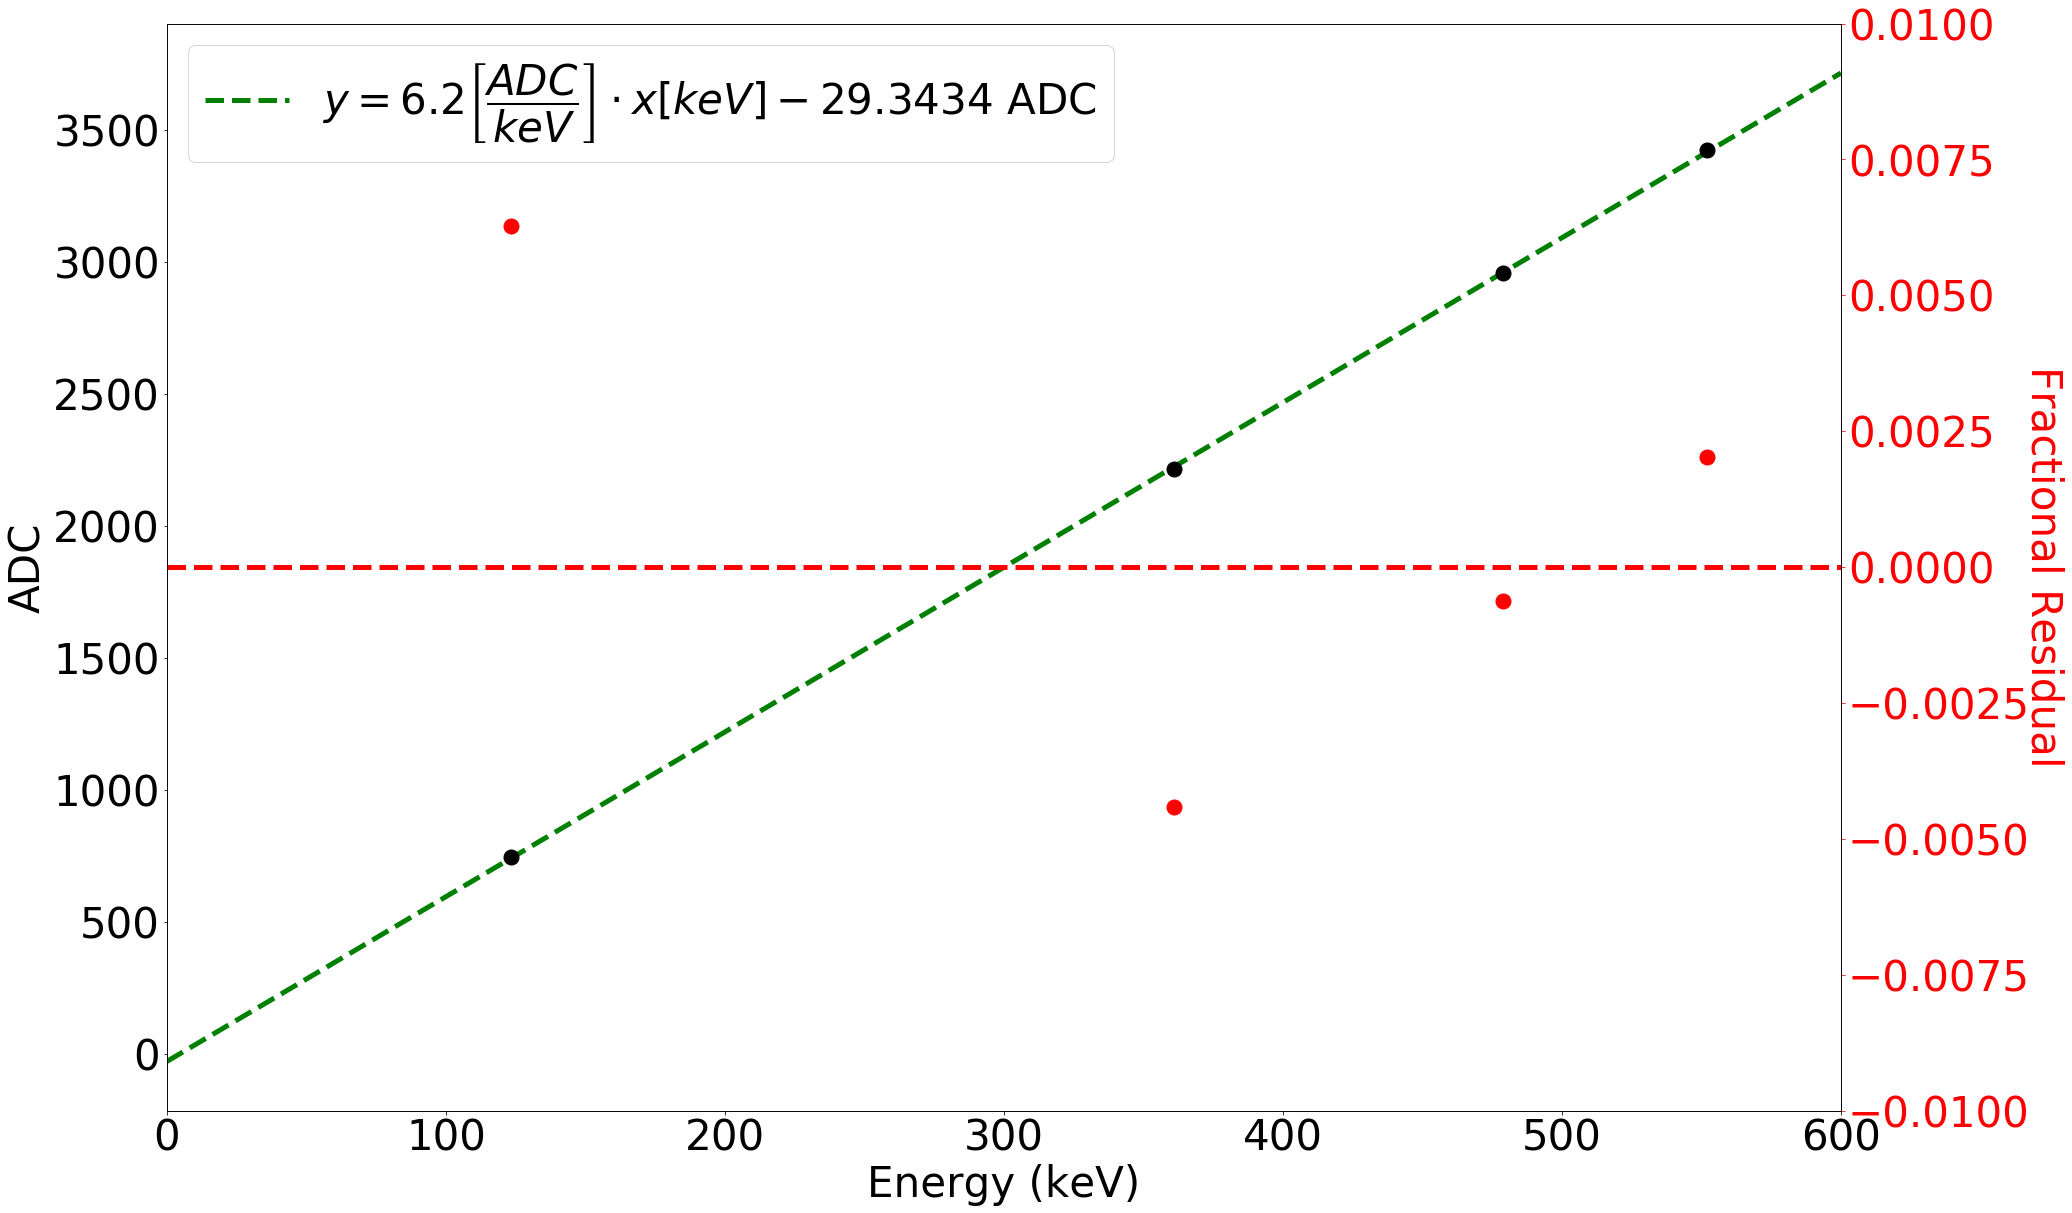

In [28]:
#Doing linear fit
plt.figure(figsize=(30,20))
line=lambda x,*par: par[0]+x*par[1]
pars,vars=curve_fit(line,np.concatenate((linearity[0:2,2],linearity[2:,2])),np.concatenate((linearity[0:2,0],linearity[2:,0])),p0=[0,0.15])
print pars
pts=np.linspace(0,600,6001)
plt.plot(pts,line(pts,*pars),'g--',lw=5,label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]  {1:0.4f}$ ADC'.format(pars[1],pars[0]))
plt.plot(linearity[:,2],linearity[:,0],'ko',ms=15)
plt.ylabel('ADC',fontsize=42)
plt.xlabel('Energy (keV)',fontsize=42)
plt.xlim(0,600)
plt.tick_params(labelsize=42)
plt.legend(loc=2,fontsize=42)

resi=[]
for i in range(len(linearity)):
    xdatum=linearity[i,2]
    ydatum=linearity[i,0]
    y=line(xdatum,*pars)
    resi.append((ydatum-y)/ydatum)
    

plt.twinx()
plt.plot(np.concatenate((linearity[0:2,2],linearity[2:,2])),np.concatenate((resi[0:2],resi[2:])),'ro',ms=15)
#plt.title('Fractional Residual (data-fit)/data',color='k',)
plt.ylabel('Fractional Residual',color='r',fontsize=42,rotation=270,labelpad=35)
plt.plot(np.arange(700),np.zeros(700),'r',ls='--',lw=5)
plt.ylim(-0.01,0.01)
plt.tick_params(colors='r',labelsize=42)




plt.savefig('Linearity.pdf',format='pdf')
plt.savefig('/home/noah/Desktop/phd/ut-thesis/figures/pdf/Linearity.pdf',format='pdf')
plt.show()

In [ ]:
resi=[]
for i in range(len(linearity)):
    xdatum=linearity[i,2]
    ydatum=linearity[i,0]
    y=line(xdatum,*pars)
    resi.append((ydatum-y)/ydatum)
    

plt.figure(figsize=(20, 10), dpi=100)
plt.plot(np.concatenate((linearity[0:2,2],linearity[2:,2])),np.concatenate((resi[0:2],resi[2:])),'bo')
plt.title('Fractional Residual (data-fit)/data',color='k',)
plt.ylabel('Residual (fractional)',color='k',fontsize=15)
plt.xlabel('Energy (keV)',color='k',fontsize='15')
plt.xlim((0,600))
plt.plot(np.arange(700),np.zeros(700),'k')
plt.tick_params(colors='k',labelsize=15)
plt.grid()
plt.savefig('Residuals.png',format='png')

In [ ]:
data=combsets([131,132,133,134,135,136,137])

In [ ]:
hist,bins=np.histogram(pd.pixcut(data,'energy',bd,ch),bins=ebins,range=erange)
bins=pd.cbins(bins)
bins=bins/pars[1]-pars[0]/pars[1]
peaks=np.loadtxt('peaks.dat')
plt.figure(figsize=(20, 10), dpi=100)
plt.plot(bins,hist/10.,ls='steps',label='Calibrated Source Data')
plt.plot(peaks[:,0],peaks[:,1],'r',ls='steps',label='CASINO Peaks')
plt.yscale('log')
plt.ylim((1,1000))
plt.xlim((30,600))
plt.xlabel('Energy (keV)',fontsize=15)
plt.legend(fontsize=8)
plt.savefig('Source_calib.png',format='png')
plt.show()

In [ ]:
del data